In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
import scipy.stats as stats
import sklearn as sk

%matplotlib inline

# Submissions are evaluated on Mean Absolute Error between your predicted winPlacePerc and the observed winPlacePerc.

# First we import the dependencies needed for handling data, visualization and training our model.

In [29]:
train = pd.read_csv('train_V2.csv')
test = pd.read_csv('test_V2.csv')

In [30]:
test.shape , train.shape

((1934174, 28), (4446966, 29))

In [31]:
submission = pd.read_csv('sample_submission_V2.csv')

In [32]:
submission.shape

(1934174, 2)

In [33]:
combined = pd.concat([train , test])

In [34]:
combined.shape

(6381140, 29)

In [35]:
combined.isnull().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
maxPlace                 0
numGroups                0
rankPoints               0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1934175
dtype: int64

In [36]:
combined.drop('winPlacePerc' , axis=1)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,-1,0,0.0000,0,0.000,0,0,244.80,1,1466
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,1484,0,0.0045,0,11.040,0,0,1434.00,5,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,1491,0,0.0000,0,0.000,0,0,161.80,2,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,1408,0,0.0000,0,0.000,0,0,202.70,3,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,1560,0,0.0000,0,0.000,0,0,49.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,...,-1,1,0.0000,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,...,-1,0,0.0000,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,...,1482,0,0.0000,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,...,1456,1,0.0000,0,0.000,0,0,1893.00,4,0


In [37]:
combined.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [38]:
combined.drop('winPlacePerc' , axis=1 , inplace=True)

In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6381140 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [40]:
combined.nunique()

Id                 6381140
groupId            2912983
matchId              68521
assists                 26
boosts                  27
damageDealt          31325
DBNOs                   41
headshotKills           35
heals                   64
killPlace              101
killPoints            1768
kills                   60
killStreaks             19
longestKill          29311
matchDuration         1318
matchType               16
maxPlace               100
numGroups              100
rankPoints            2440
revives                 25
rideDistance         35911
roadKills               15
swimDistance         30196
teamKills               12
vehicleDestroys          6
walkDistance         40202
weaponsAcquired        100
winPoints             1516
dtype: int64

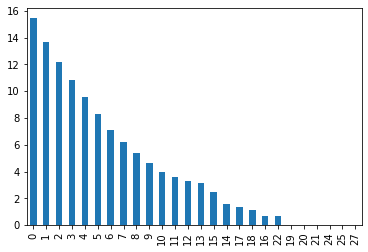

In [41]:
np.log(combined.assists.value_counts()).plot(kind='bar')
plt.show()